In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [197]:
df = pd.read_csv("customer_churn_business_dataset.csv")
df.head()

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.354360,Service,4.0,0,0.71,0.40,27,Satisfied,1,0
1,CUST_00002,Female,57,Canada,Sydney,Individual,9,Mobile,Monthly,7,...,25.140088,Billing,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Male,24,Germany,New York,SME,58,Web,Yearly,19,...,27.572928,Service,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Male,49,Australia,Dhaka,Individual,19,Mobile,Yearly,34,...,26.420822,Technical,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Male,65,Bangladesh,Delhi,Individual,52,Web,Monthly,20,...,26.674579,Technical,4.0,0,0.65,0.44,21,Unsatisfied,1,0


In [198]:
df.shape

(10000, 32)

In [199]:
df.isnull().sum()
df.dtypes

customer_id                object
gender                     object
age                         int64
country                    object
city                       object
customer_segment           object
tenure_months               int64
signup_channel             object
contract_type              object
monthly_logins              int64
weekly_active_days          int64
avg_session_time          float64
features_used               int64
usage_growth_rate         float64
last_login_days_ago         int64
monthly_fee                 int64
total_revenue               int64
payment_method             object
payment_failures            int64
discount_applied           object
price_increase_last_3m     object
support_tickets             int64
avg_resolution_time       float64
complaint_type             object
csat_score                float64
escalations                 int64
email_open_rate           float64
marketing_click_rate      float64
nps_score                   int64
survey_respons

In [200]:
df["complaint_type"] = df["complaint_type"].fillna("None")

In [201]:
def clean_numerical_data(df):
    pattern = r"^(0|[1-9]\d*)$"
    numerical_columns = ["age", "tenure_months", "monthly_logins", "weekly_active_days", "features_used", "last_login_days_ago", "monthly_fee", "total_revenue", "payment_failures", "support_tickets", "escalations", "referral_count"]
    for column in numerical_columns:
        invalid_mask = ~df[column].astype(str).str.fullmatch(pattern)
        if invalid_mask.any():
            df.loc[invalid_mask, column] = 0
    return df

df = clean_numerical_data(df)

In [202]:
def clean_nps_score(df):
    if df["nps_score"].any() >= -100 & df["nps_score"].any() <= 100:
        df["nps_score"] = df["nps_score"]
    else:
        df["nps_score"] = 0
    return df

df = clean_nps_score(df)

In [203]:
df["city"].unique()

array(['London', 'Sydney', 'New York', 'Dhaka', 'Delhi', 'Toronto',
       'Berlin'], dtype=object)

In [204]:
df["discount_applied"].unique()

array(['Yes', 'No'], dtype=object)

In [205]:
df["customer_id"].duplicated().sum()

np.int64(0)

In [206]:
expected_revenue = df["tenure_months"] * df["monthly_fee"]
diff = (expected_revenue.round(2) - df["total_revenue"].round(2)).abs()
error_count = (diff > 0).sum()
print(error_count)

0


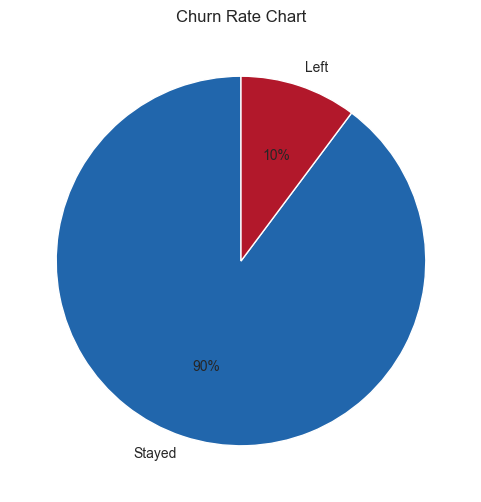

In [207]:
churn_count = df["churn"].value_counts()
labels = ["Stayed" if idx==0 else "Left" for idx in churn_count.index]
custom_colors = ['#2166AC', '#B2182B']

plt.figure(figsize = (6, 6))
color = sns.color_palette("bright")
plt.pie(churn_count, colors=custom_colors, autopct="%.0f%%", startangle=90, labels=labels)
plt.title("Churn Rate Chart")
plt.show()

In [208]:
df["avg_session_time"] = df["avg_session_time"].round(2)
df["avg_resolution_time"] = df["avg_resolution_time"].round(2)
df.columns

Index(['customer_id', 'gender', 'age', 'country', 'city', 'customer_segment',
       'tenure_months', 'signup_channel', 'contract_type', 'monthly_logins',
       'weekly_active_days', 'avg_session_time', 'features_used',
       'usage_growth_rate', 'last_login_days_ago', 'monthly_fee',
       'total_revenue', 'payment_method', 'payment_failures',
       'discount_applied', 'price_increase_last_3m', 'support_tickets',
       'avg_resolution_time', 'complaint_type', 'csat_score', 'escalations',
       'email_open_rate', 'marketing_click_rate', 'nps_score',
       'survey_response', 'referral_count', 'churn'],
      dtype='object')

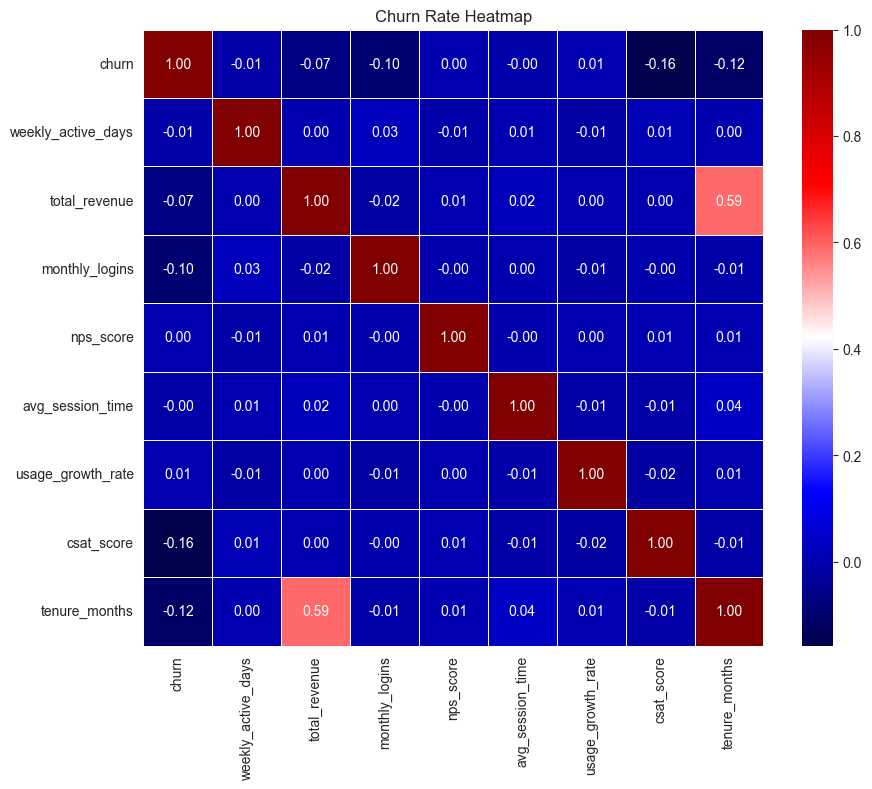

In [209]:
heatmap_columns = ["churn", "weekly_active_days", "total_revenue", "monthly_logins", "nps_score", "avg_session_time", "usage_growth_rate", "csat_score", "tenure_months"]

plt.figure(figsize = (10, 8))
sns.heatmap(df[heatmap_columns].corr(), annot = True, fmt=".2f", cmap="seismic", linewidths=0.5)
plt.title("Churn Rate Heatmap")
plt.show()

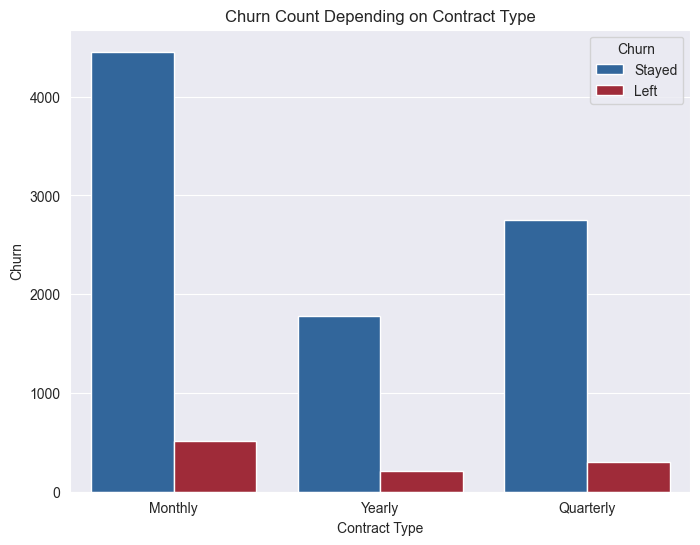

In [210]:
plt.figure(figsize = (8, 6))
sns.countplot(data=df, x="contract_type", hue="churn", palette=['#2166AC', '#B2182B'])
plt.title("Churn Count Depending on Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn")
plt.legend(title="Churn", labels=["Stayed", "Left"])
plt.show()

Text(0.5, 0, 'Tenure Months')

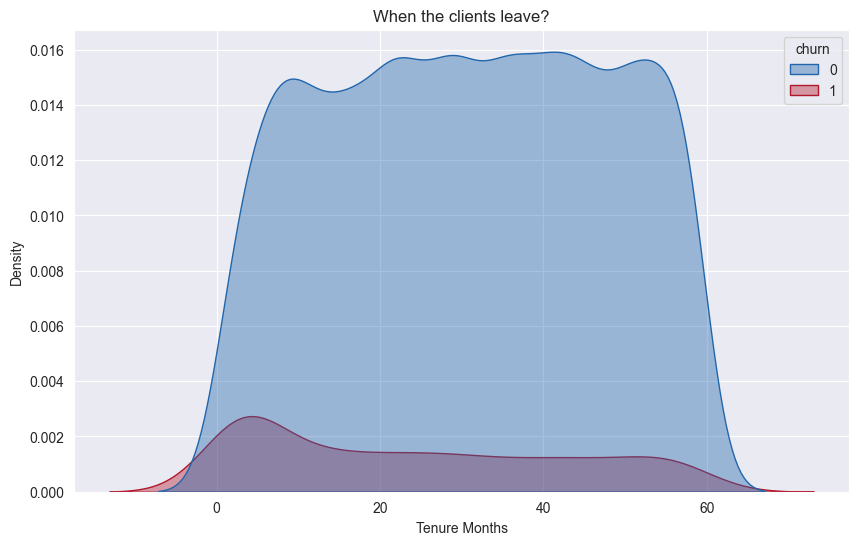

In [211]:
plt.figure(figsize = (10, 6))
sns.kdeplot(data=df, x="tenure_months", hue="churn", fill=True, palette=['#2166AC', '#B2182B'], alpha=0.4)
plt.title("When the clients leave?")
plt.xlabel("Tenure Months")


([<matplotlib.axis.XTick at 0x1f8fd028e10>,
 [Text(0, 0, 'Stayed'), Text(1, 0, 'Left')])

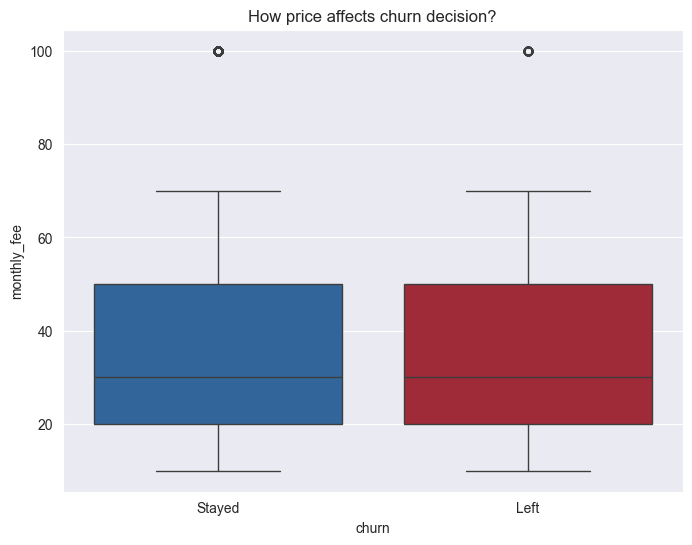

In [212]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df, x="churn", y="monthly_fee", palette=['#2166AC', '#B2182B'], hue="churn", legend=False)
plt.title("How price affects churn decision?")
plt.xticks([0, 1], ['Stayed', 'Left'])

In [213]:
df["support_intensity"] = (df["support_tickets"] / (df["tenure_months"] + 0.1)).round(2)
df["total_client_value"] = df["tenure_months"] * df["monthly_fee"]
df["dormant_risk"] = (df["last_login_days_ago"] > 14).astype(int)
print(df[["support_intensity", "dormant_risk", "total_client_value"]].head())

   support_intensity  dormant_risk  total_client_value
0               0.18             0                 660
1               0.11             0                 270
2               0.02             1                1160
3               0.16             1                 570
4               0.00             0                2600


In [214]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [215]:
df.dtypes

customer_id                object
gender                     object
age                         int64
country                    object
city                       object
customer_segment           object
tenure_months               int64
signup_channel             object
contract_type              object
monthly_logins              int64
weekly_active_days          int64
avg_session_time          float64
features_used               int64
usage_growth_rate         float64
last_login_days_ago         int64
monthly_fee                 int64
total_revenue               int64
payment_method             object
payment_failures            int64
discount_applied           object
price_increase_last_3m     object
support_tickets             int64
avg_resolution_time       float64
complaint_type             object
csat_score                float64
escalations                 int64
email_open_rate           float64
marketing_click_rate      float64
nps_score                   int64
survey_respons

In [216]:
numeric_features = ["age", "tenure_months", "monthly_logins", "weekly_active_days", "features_used",
                    "usage_growth_rate", "last_login_days_ago", "monthly_fee", "total_revenue", "payment_failures", "support_tickets", "avg_resolution_time", "csat_score", "escalations", "email_open_rate", "marketing_click_rate", "nps_score", "referral_count", "support_intensity", "total_client_value", "dormant_risk", "avg_session_time"]
categorical_features = ["gender", "country", "city", "customer_segment", "signup_channel", "contract_type", "payment_method", "complaint_type", "survey_response", "discount_applied", "price_increase_last_3m" ]
to_drop = ["churn", "customer_id"]

In [217]:
x = df.drop(columns=to_drop)
y = df["churn"]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [218]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [219]:
from sklearn.ensemble import RandomForestClassifier

model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, max_depth=10, class_weight="balanced", random_state=42))
])

model_pipeline.fit(X_train, Y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [220]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_pipeline.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1796
           1       0.30      0.25      0.28       204

    accuracy                           0.86      2000
   macro avg       0.61      0.59      0.60      2000
weighted avg       0.85      0.86      0.86      2000



Text(45.722222222222214, 0.5, 'True')

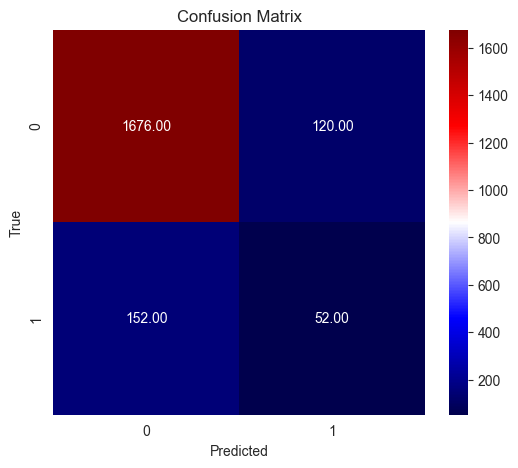

In [224]:
plt.figure(figsize = (6, 5))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt=".2f", cmap="seismic")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")